In [1]:
import time
import itertools
import time, os, fnmatch, shutil
import pickle
import re
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
import matplotlib

#matplotlib.rcParams.update({'font.size': 22})

%matplotlib inline

from __future__ import print_function, division
import requests

In [2]:
pkl_filename_master = "IP_OP_Hosp_cost_dem_inc_df_3_levels.pkl"
with open(pkl_filename_master, 'rb') as picklefile: 
    df_model_data = pickle.load(picklefile)

In [3]:
correlation_plot = df_model_data.copy()

In [4]:
correlation_plot = correlation_plot.drop([u'Average_Covered_Charges', u'Average_Medicare_Payments',\
       u'Average_Total_Payments', \
       u'Hospital_Referral_Region_(HRR)_Description', u'Provider_City',\
       u'Provider_ID', u'Provider_Name',\
       u'Provider_Street_Address',u'Total_Discharges',\
       u'Hospital_Name',u'Patient_payment',\
       u'log_Average_Covered_Charges', u'log_Average_Medicare_Payments',\
       u'log_Average_Total_Payments', u'log_Patient_payment',\
       u'Average_Covered_Charges_mean',\
       u'Average_Covered_Charges_std', u'Average_Medicare_Payments_mean',\
       u'Average_Medicare_Payments_median', u'Average_Medicare_Payments_std',\
       u'Average_Total_Payments_mean', u'Average_Total_Payments_median',\
       u'Average_Total_Payments_std', u'Patient_payment_mean',\
       u'Patient_payment_median', u'Patient_payment_std',\
       u'log_Average_Covered_Charges_mean',\
       u'log_Average_Covered_Charges_median',\
       u'log_Average_Covered_Charges_std',\
       u'log_Average_Medicare_Payments_mean',\
       u'log_Average_Medicare_Payments_median',\
       u'log_Average_Medicare_Payments_std',\
       u'log_Average_Total_Payments_mean',\
       u'log_Average_Total_Payments_median', u'log_Average_Total_Payments_std',\
       u'log_Patient_payment_mean', u'log_Patient_payment_median',\
       u'log_Patient_payment_std', u'Average_Covered_Charges_ST_mean',\
       u'Average_Covered_Charges_ST_median', u'Average_Covered_Charges_ST_std',\
       u'Average_Medicare_Payments_ST_mean',\
       u'Average_Medicare_Payments_ST_median',\
       u'Average_Medicare_Payments_ST_std', u'Average_Total_Payments_ST_mean',\
       u'Average_Total_Payments_ST_median', u'Average_Total_Payments_ST_std',\
       u'Patient_payment_ST_mean', u'Patient_payment_ST_median',\
       u'Patient_payment_ST_std', u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
       u'Provider_State', u'Provider_Zip_Code',\
        u'State_spelled', u'County_State',\
        u'County', u'State',\
        u'DRG_Definition', u'Service_type', u'Hospital_Type',\
       u'Hospital_Ownership', u'Emergency_Services',\
       u'Average_Covered_Charges_median_3_bins',\
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',  u'County_Name'],1)
 

In [5]:
correlation_plot.columns

Index([u'Average_Covered_Charges_median', u'Median_Age',
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',
       u'Percent_Native_American', u'Percent_asian',
       u'Percent Black or African American', u'Percent_female',
       u'Percent_hispanic_or_latino', u'Percent_Male',
       u'Percent_Occupied_Housing_Units_y', u'Percent_some_other_race',
       u'Percent_white', u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Mean_income_zip',
       u'Zip_population'],
      dtype='object')

In [6]:
correlation_plot_1a = correlation_plot.drop([
       u'Percent_Occupied_Housing_Units_y', u'Percent_some_other_race',\
       u'Percent_white', u'Rental_vacancy_rate', u'Homeowner_vacancy_rate', u'Mean_income_zip',\
    u'Percent_Native_American', u'Percent_Male', u'Percent_some_other_race',],1)

In [7]:
correlation_plot_1a.columns

Index([u'Average_Covered_Charges_median', u'Median_Age',
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',
       u'Percent_asian', u'Percent Black or African American',
       u'Percent_female', u'Percent_hispanic_or_latino',
       u'Average_family_size', u'Median_income_zip', u'Zip_population'],
      dtype='object')

In [8]:
correlation_plot_1a = correlation_plot_1a.dropna(axis=0)

In [9]:
correlation_plot_1a['Median_income_zip'].value_counts

<bound method Series.value_counts of 0          12468.0137
1          63451.0000
2          50669.1236
4          52859.2907
6          71132.4087
10         55839.2906
12         59361.0799
13         62345.9635
14         24943.0000
15         68825.4127
16         31645.4890
17         58593.4064
18         47575.8578
19         85578.2508
20         33347.4676
21         45545.9013
22         18150.3628
25         30282.3323
26         31442.2820
27         32317.0325
28         21223.3738
29         23146.2717
30         82398.7761
31         46086.2021
32         15195.3919
34         37274.7314
36         39986.6719
37         44192.9491
38         32876.5220
39        113800.3846
             ...     
238513     73753.8324
238514     47212.8027
238515     46389.4598
238516     12468.0137
238517     75105.6432
238520    113958.0207
238523     61246.9852
238524     32958.2893
238525     30369.1539
238526     62912.3668
238527     90716.5790
238528     39971.1587
238529     31222.

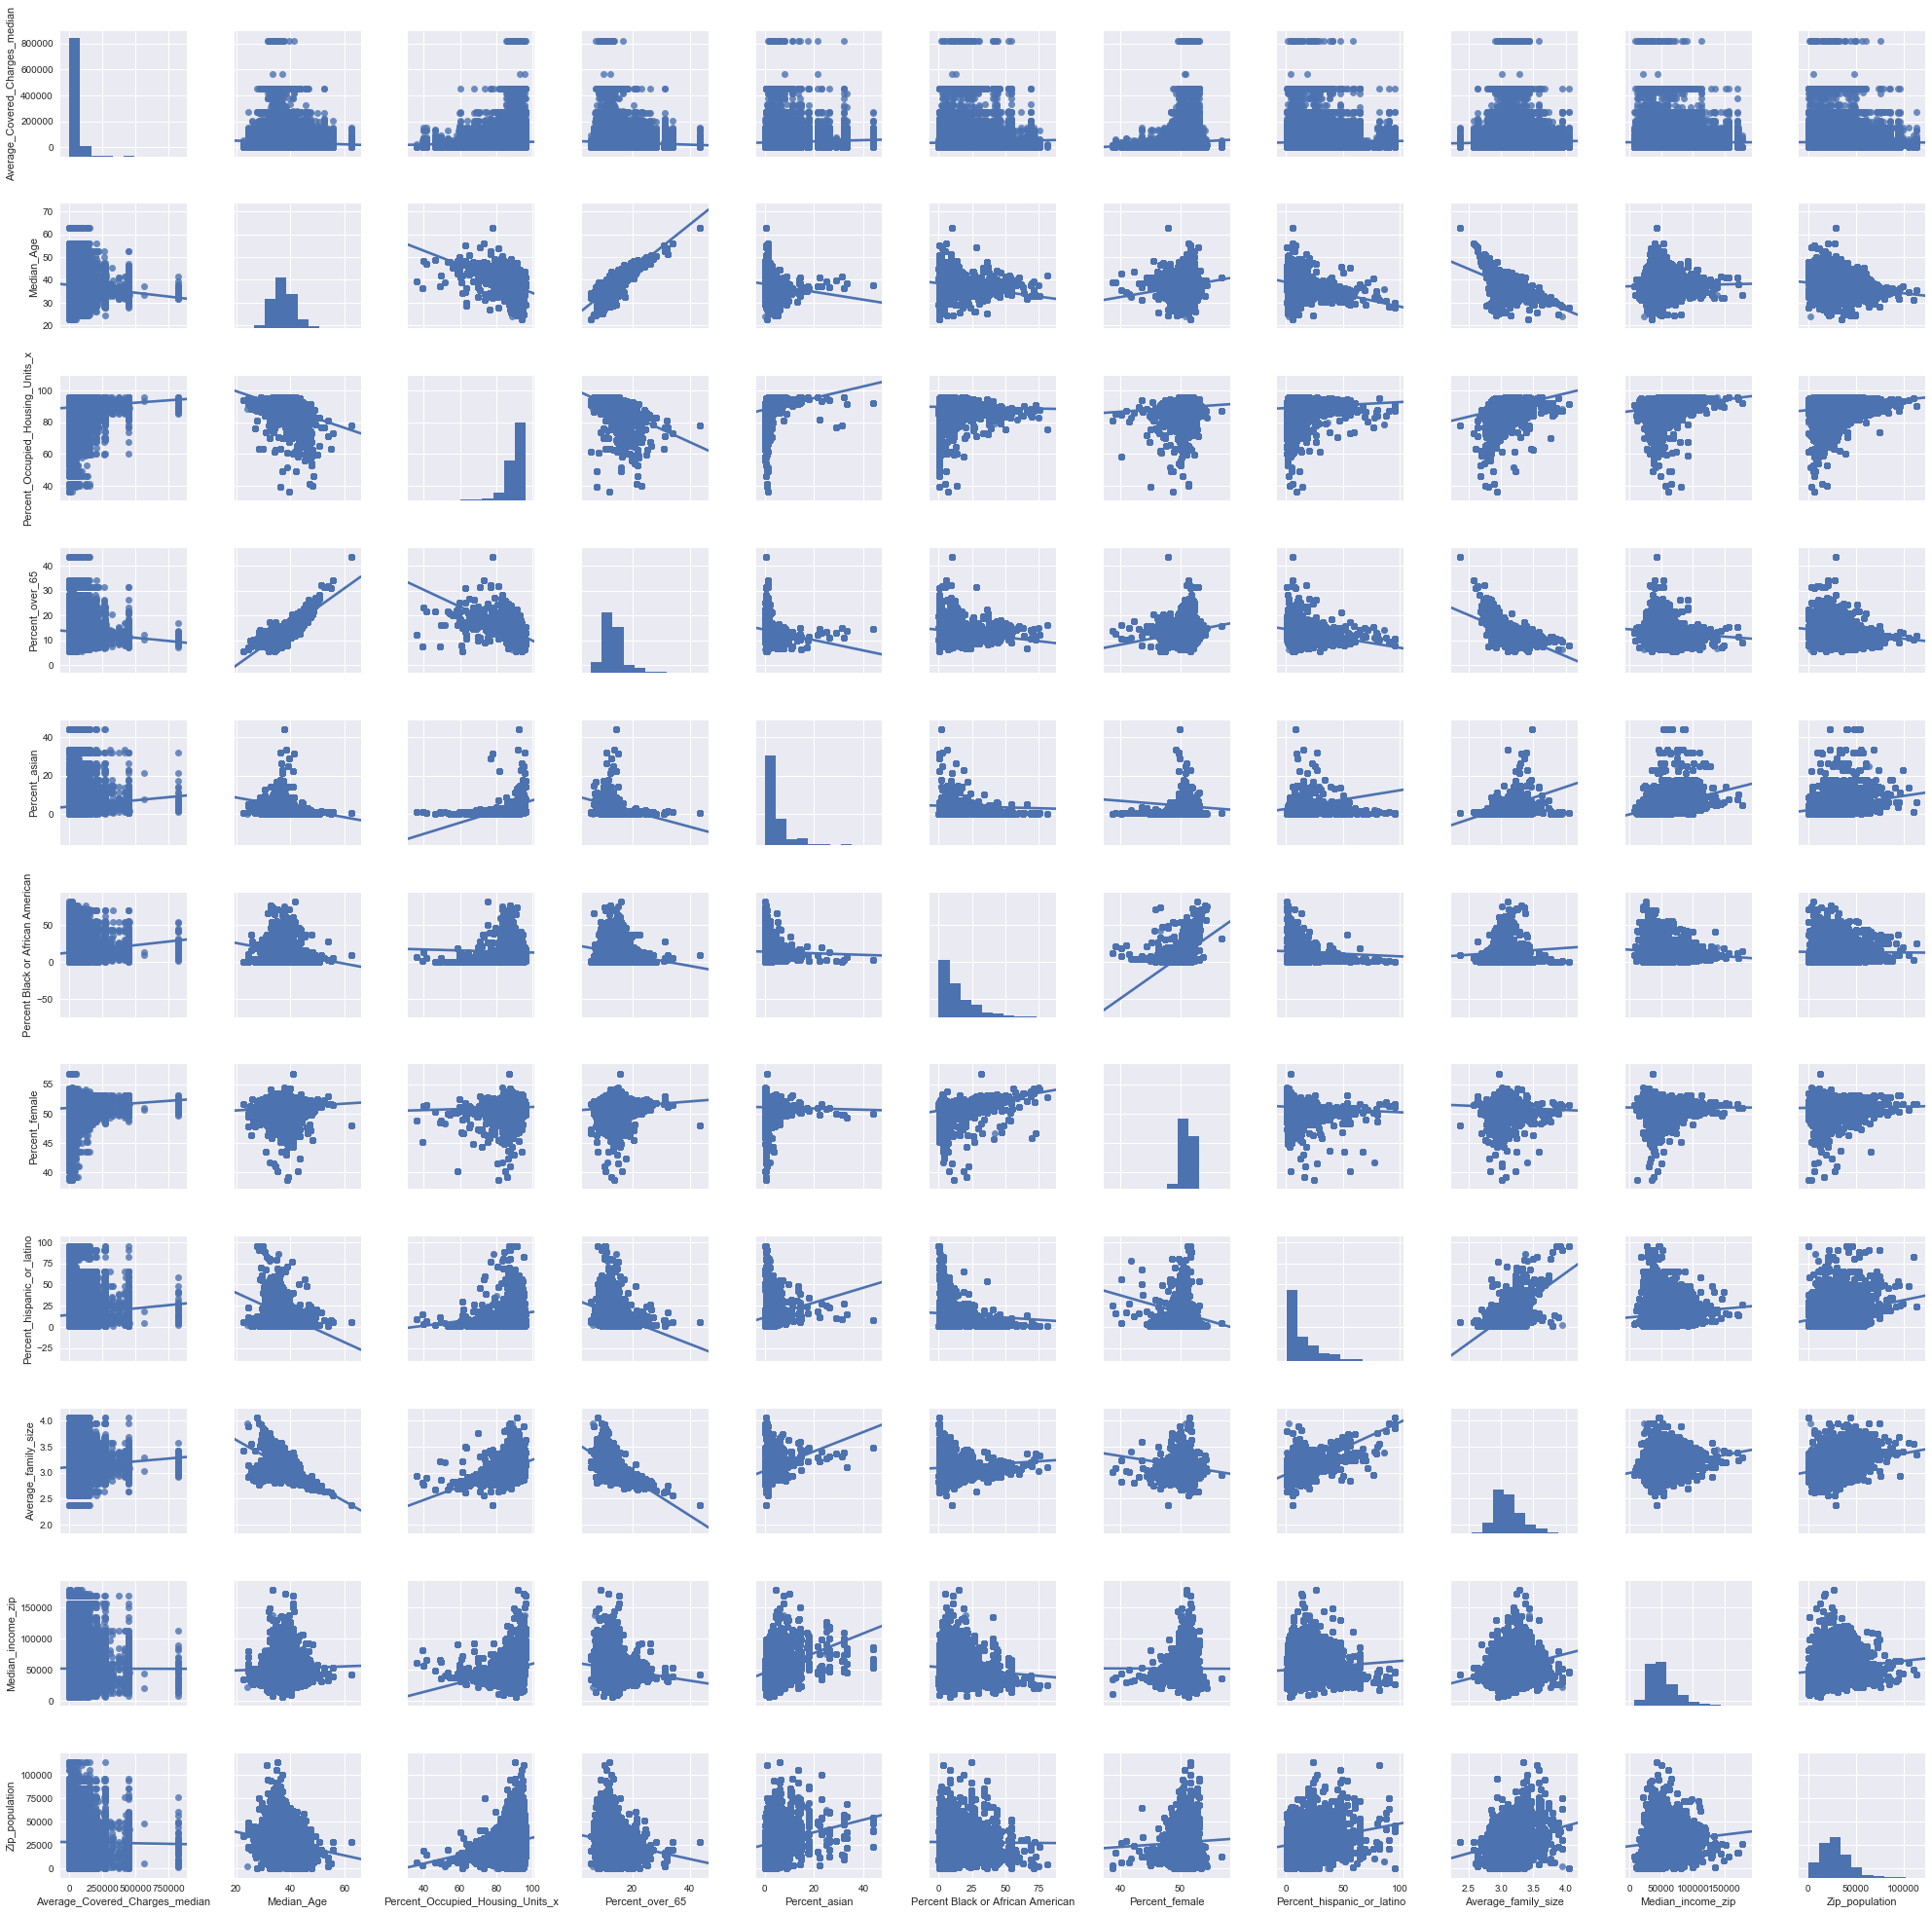

In [46]:
sns.pairplot(correlation_plot_1a,kind="reg")

In [10]:
pkl_filename_master = 'IP_OP_Hosp_cost_dem_inc_HI_df_3_levels.pkl'
with open(pkl_filename_master, 'rb') as picklefile: 
    df_model_data_hi = pickle.load(picklefile)

In [11]:
correlation_plot_2 = df_model_data_hi.copy()

In [12]:
correlation_plot_2 = correlation_plot_2.drop([u'Average_Covered_Charges', u'Average_Medicare_Payments',\
       u'Average_Total_Payments', \
       u'Hospital_Referral_Region_(HRR)_Description', u'Provider_City',\
       u'Provider_ID', u'Provider_Name',\
       u'Provider_Street_Address',u'Total_Discharges',\
       u'Hospital_Name',u'Patient_payment',\
       u'log_Average_Covered_Charges', u'log_Average_Medicare_Payments',\
       u'log_Average_Total_Payments', u'log_Patient_payment',\
       u'Average_Covered_Charges_mean',\
       u'Average_Covered_Charges_std', u'Average_Medicare_Payments_mean',\
       u'Average_Medicare_Payments_median', u'Average_Medicare_Payments_std',\
       u'Average_Total_Payments_mean', u'Average_Total_Payments_median',\
       u'Average_Total_Payments_std', u'Patient_payment_mean',\
       u'Patient_payment_median', u'Patient_payment_std',\
       u'log_Average_Covered_Charges_mean',\
       u'log_Average_Covered_Charges_median',\
       u'log_Average_Covered_Charges_std',\
       u'log_Average_Medicare_Payments_mean',\
       u'log_Average_Medicare_Payments_median',\
       u'log_Average_Medicare_Payments_std',\
       u'log_Average_Total_Payments_mean',\
       u'log_Average_Total_Payments_median', u'log_Average_Total_Payments_std',\
       u'log_Patient_payment_mean', u'log_Patient_payment_median',\
       u'log_Patient_payment_std', u'Average_Covered_Charges_ST_mean',\
       u'Average_Covered_Charges_ST_median', u'Average_Covered_Charges_ST_std',\
       u'Average_Medicare_Payments_ST_mean',\
       u'Average_Medicare_Payments_ST_median',\
       u'Average_Medicare_Payments_ST_std', u'Average_Total_Payments_ST_mean',\
       u'Average_Total_Payments_ST_median', u'Average_Total_Payments_ST_std',\
       u'Patient_payment_ST_mean', u'Patient_payment_ST_median',\
       u'Patient_payment_ST_std', u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
       u'Provider_State', u'Provider_Zip_Code',\
        u'State_spelled', u'County_State',\
        u'County', u'State',\
        u'DRG_Definition', u'Service_type', u'Hospital_Type',\
       u'Hospital_Ownership', u'Emergency_Services',\
       u'Average_Covered_Charges_median_3_bins',\
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',  u'County_Name',\
        u'Age Category', u'Income Category', u'Race Category', u'Sex Category',\
       u'Year', u'ID', u'Name', u'Demographic Group: Number',\
       u'Demographic Group: MOE', u'Uninsured: Number', u'Uninsured: MOE',\
       u'Uninsured: %MOE', u'Insured: Number',\
       u'Insured: MOE', u'Insured: %', u'Insured: %MOE', u'Name_split',\
       u'State_abbrev', u'county_only', u'State_full', \
        u'Median_Age',\
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',\
       u'Percent_Native_American', u'Percent_female', u'Percent_Male',\
       u'Percent_Occupied_Housing_Units_y', u'Percent_some_other_race', \
        u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',\
       u'Average_family_size',    u'Mean_income_zip', u'Percent_asian',\
       u'Zip_population' ],1)
 

In [13]:
correlation_plot_2.columns

Index([u'Uninsured: %', u'Average_Covered_Charges_median',
       u'Percent Black or African American', u'Percent_hispanic_or_latino',
       u'Percent_white', u'Median_income_zip'],
      dtype='object')

In [14]:
correlation_plot_2 = correlation_plot_2.dropna(axis=0)

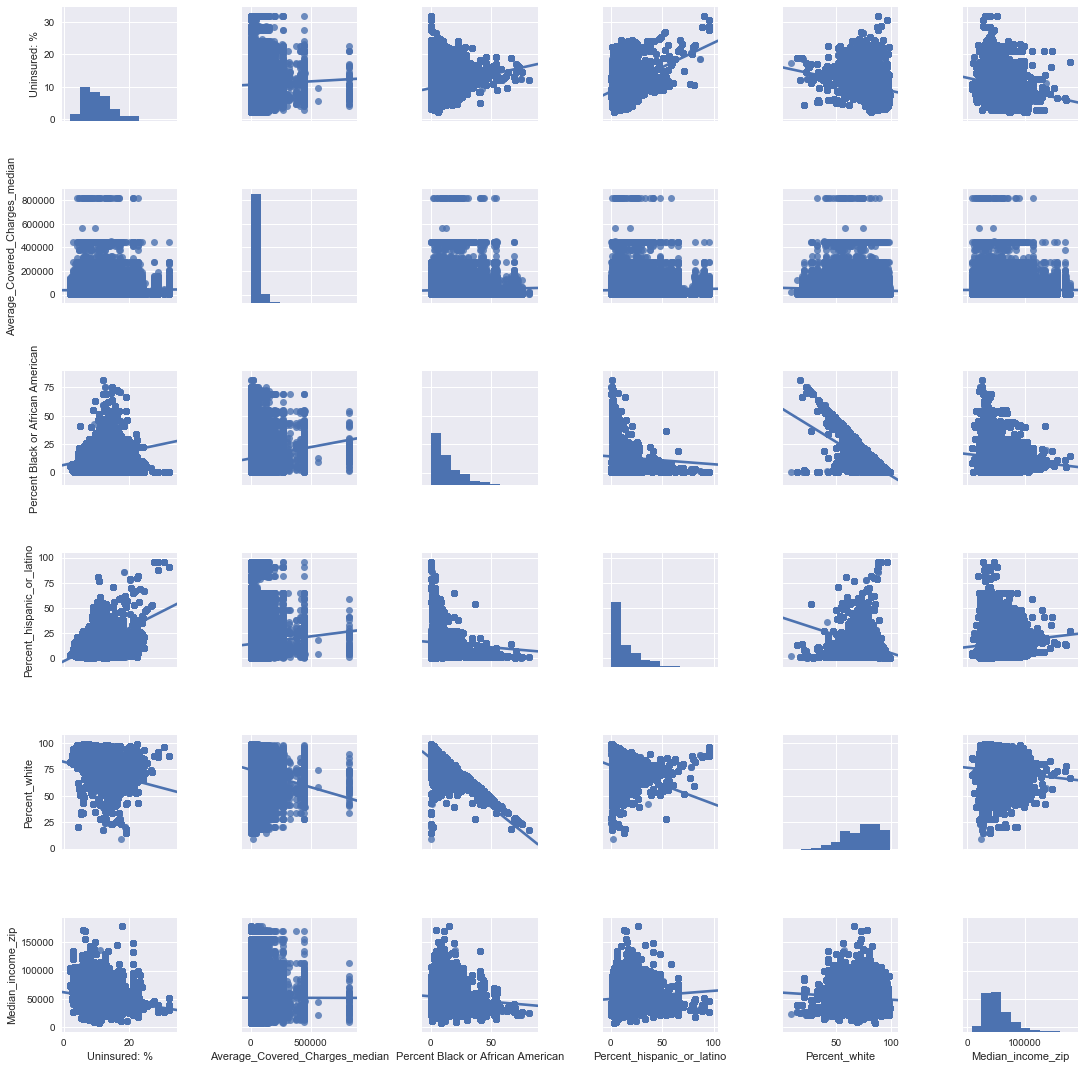

In [65]:
sns.pairplot(correlation_plot_2,kind="reg")

In [15]:
correlation_plot_3 = correlation_plot_2.drop([ u'Average_Covered_Charges_median',u'Median_income_zip'],1)

In [ ]:
sns.heatmap(correlation_plot_3)

KeyboardInterrupt: 

In [16]:
correlation_plot_3.shape

(202631, 4)

In [18]:
sample_df = correlation_plot_3.sample(n=5000)

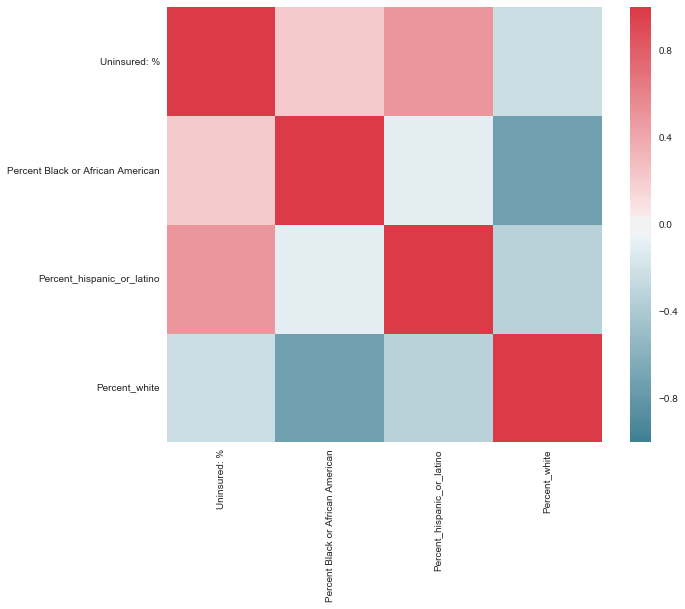

In [20]:
import seaborn as sns
import plotly as pl

f, ax = plt.subplots(figsize=(10, 8))
corr = sample_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

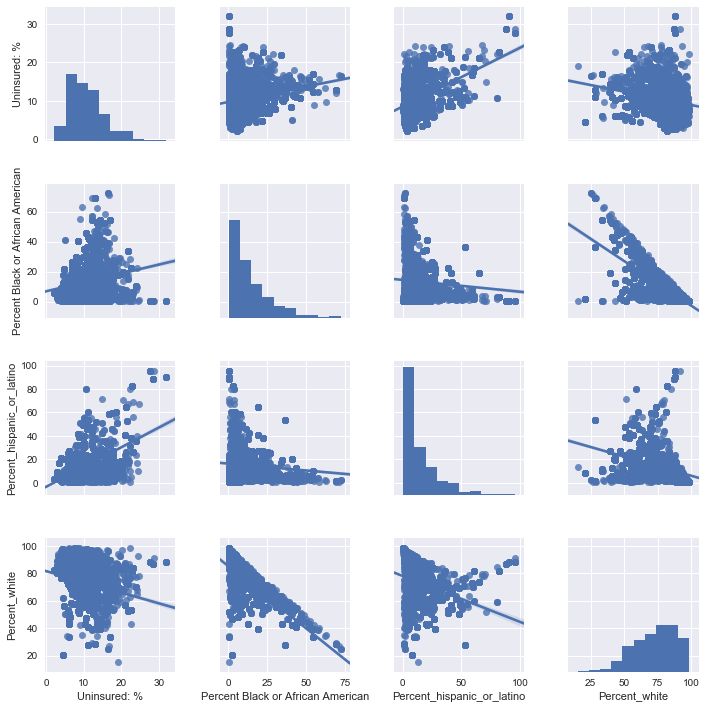

In [21]:
sns.pairplot(sample_df,kind="reg")